In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import string


In [2]:
csv_file_path = './airbnb_dataset/data.csv'
df = pd.read_csv(csv_file_path)
pd.set_option('display.max_columns', None)
df.head()

,log_price,accommodates,bathrooms,host_response_rate,bedrooms,beds,cleaning_fee_True,host_has_profile_pic_t,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,city_encoded,des_sentiment_analysis,name_sentiment_analysis
0,5.010635,-0.072621,-0.404046,0.296013,-0.312048,-0.566461,1,1,-0.221989,0.879947,0.206922,1.031946,-0.417068,0.216242,-0.435248
1,5.129899,1.783653,-0.404046,0.296013,2.034955,1.027816,1,1,-0.248121,0.883912,0.178912,1.034251,-0.425829,0.837002,-1.788095
2,4.976734,0.855516,-0.404046,0.296013,-0.312048,1.027816,1,1,-0.252342,0.869698,0.126796,-0.607644,-0.445747,0.808508,-0.133695
3,6.620073,0.391448,-0.404046,0.296013,0.861454,0.230678,1,1,0.187295,0.883912,0.178912,-0.976832,2.696289,0.213627,-0.926212
4,4.744932,-0.536689,-0.404046,0.296013,-1.485549,-0.566461,1,1,-0.242856,0.875005,0.145414,-0.634193,1.380088,-0.101872,-0.095776


In [4]:
X = df.drop(['log_price'], axis=1)  
y = df['log_price']

2nd Polynomial Regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import plotly.graph_objects as go
import plotly.express as px


In [6]:
features = [col for col in df.columns if col != 'log_price' and df[col].dtype in ['int64', 'float64']]
X = df[features]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Plot the truth vs prediction
def plot_truth_vs_pred(df_plot,degree):
  # plot all the datas
  fig = px.scatter(df_plot, x='ground truth', y='Predicted', title=f'Truth vs Prediction (Degree {degree})')

  cof = np.polyfit(df_plot['ground truth'], df_plot['Predicted'], degree)
  poly = np.poly1d(cof)
  x_values = np.linspace(df_plot['ground truth'].min(), df_plot['ground truth'].max(), 100)
  fitted_y_values = poly(x_values)

  # Add the y = x line
  fig.add_trace(go.Scatter(x=df_plot['ground truth'], y=df_plot['ground truth'], mode='lines', name='ground truth line', line=dict(color='firebrick', width=2)))

  # Add the polynomial fit line
  if degree > 1:
      fig.add_trace(go.Scatter(x=x_values, y=fitted_y_values, mode='lines', name=f'Polynomial Fit Degree {degree}', line=dict(color='royalblue', width=2)))

  fig.update_layout(title='Polynomial Fit According to Degree', xaxis_title='Ground Truth', yaxis_title='Predicted')
  fig.show()

  
# Plot the residuals
def plot_residuals(df_plot, save = False):
  plt.figure(figsize=(10, 6))
  
  # Plot the residuals
  sns.scatterplot(x='Predicted', y='Residuals', data=df_plot, alpha=0.5)
  
  plt.title('Sampled Residuals vs. Predicted Values')
  plt.xlabel('Predicted Values')
  plt.ylabel('Sampled Residuals')
  
  # Add a horizontal line at y = 0
  plt.axhline(y=0, color='red', linestyle='--') 
  
  
  if save:
    plt.savefig('graphs/residuals.png')
    
    
  plt.show()
  
  
def plot_regression(df_plot, degree,save = False):
  # Plot the truth vs prediction
  sns.regplot(data=df_plot, x='ground truth', y='ground truth', order = degree, ci = None, line_kws=dict(color="orange"), label ='Perfect Fit', scatter_kws={'alpha':0.5}, scatter=False)
  # Plot the polynomial fit
  sns.regplot(data=df_plot, x='ground truth', y='Predicted', order = degree, ci = 99, color='blue', line_kws=dict(color="r",label='Predictions'), scatter_kws={'alpha':0.5})
  
  plt.legend()
  
  if save:
    plt.savefig('graphs/regression.png')



# Plot the graphs
def plot_graphs(y_test, yhat_test, degree = 1,save = False):
  df_plot = pd.DataFrame({'ground truth':y_test, 'Predicted': yhat_test, 'Residuals': y_test-yhat_test})
  df_plot = df_plot[np.abs(df_plot['Residuals']) < 0.9 * np.max(np.abs(df_plot['Residuals']))]
  df_sample = df_plot.sample(frac=0.1,random_state=42)
  

  plot_truth_vs_pred(df_sample,degree)   # plotply version, cannot show in github
  plot_residuals(df_sample, save =save)
  plot_regression(df_sample, degree, save =save)

In [9]:
degree=2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 score: {r2}')

MSE: 0.19455465634412603
R2 score: 0.6296371548870936


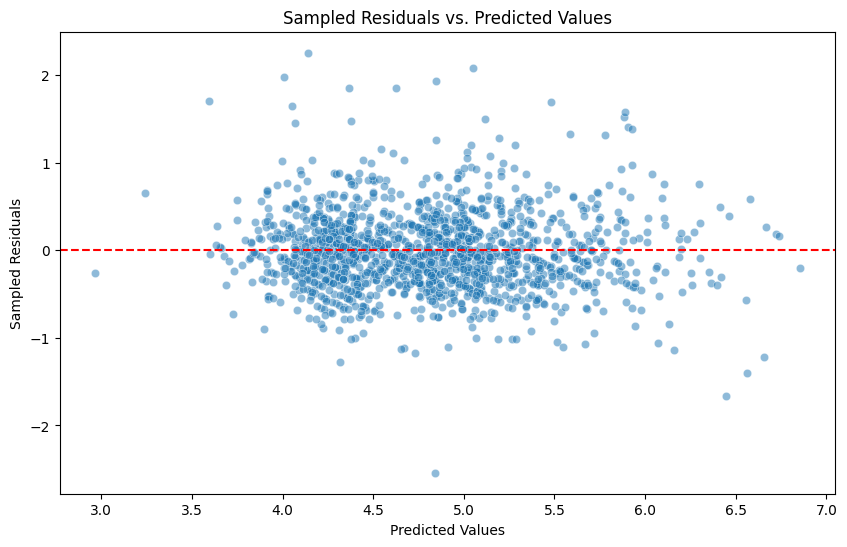

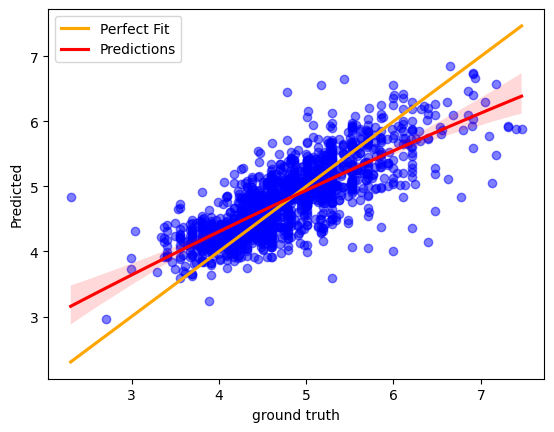

In [10]:
plot_graphs(y_test, y_pred, degree, save = True)